# LIVER DISEASE PREDICTION

In this project, we are going to use the Indian Liver Patient Records dataset from Kaggle. We will predict whether a patient has liver disease or not based on certain features. We are going to check with the total proteins, albumin, etc. whether it is associated with the disease or not.

****

# Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Reading the Dataset

The data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90". [Source](https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)#)

In [2]:
patients_data = pd.read_csv("C:/Users/ssriv/Desktop/AI Finalproject/indian_liver_patient (1).csv")
patients_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
patients_data.shape

(583, 11)

**Our dataset contains 583 rows and 11 columns.**

# Exploratory Data Analysis

**Age distribution of the patients**

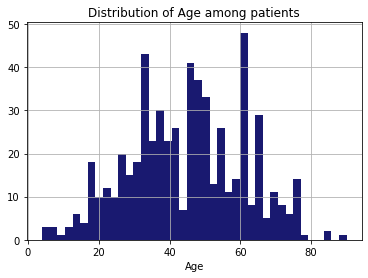

In [4]:
patients_data['Age'].hist(bins=40, color='midnightblue')
plt.title("Distribution of Age among patients")
plt.xlabel("Age");

**Distribution of Gender in patients in the dataset**

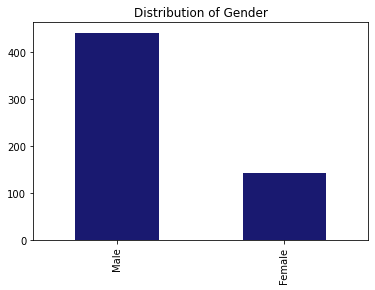

In [5]:
patients_data['Gender'].value_counts().plot.bar(color='midnightblue')
plt.title("Distribution of Gender");

From the above graph, we can see that Number of males are more than the Number of females.

**Diagnosis of the patients**

The column named Dataset has two values, 1 symbolises that the patient has liver disease and 0 symbolises that the patient has no disease.

In [6]:
# changing the column name
patients_data.rename(columns={'Dataset': 'Diagnosis'}, inplace=True)

# changing labels
patients_data['Diagnosis'] = patients_data['Diagnosis'].apply(lambda x:1 if x==1 else 0)

**Let us check the countplot of our Diagnosis column.**

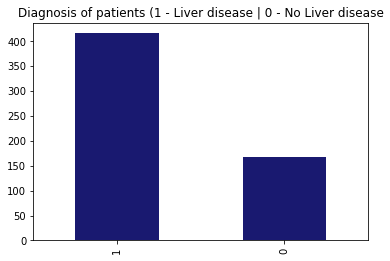

In [7]:
patients_data['Diagnosis'].value_counts().plot.bar(color='midnightblue')
plt.title('Diagnosis of patients (1 - Liver disease | 0 - No Liver disease');

Our dataset contains more patients with a positive liver disease diagnosis than the ones with no disease.

### Checking for null values

Let us check for the null values.

In [8]:
patients_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Diagnosis                     0
dtype: int64

**We can see that there are 4 null values in the Albumin and Globulin Ratio column.**

### Filling null values

Let us fill these null values by imputing the mean of that column.

In [9]:
mean_ratio = patients_data['Albumin_and_Globulin_Ratio'].mean()
mean_ratio

0.9470639032815201

In [10]:
patients_data = patients_data.fillna(mean_ratio)

**We have now filled the null values with the mean of that column.** 

In [11]:
patients_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Diagnosis                     0
dtype: int64

**We have now removed all the null values from our dataset.**

### Exploring feature columns

**Let us view the pairplot of the patients data based on Gender.**

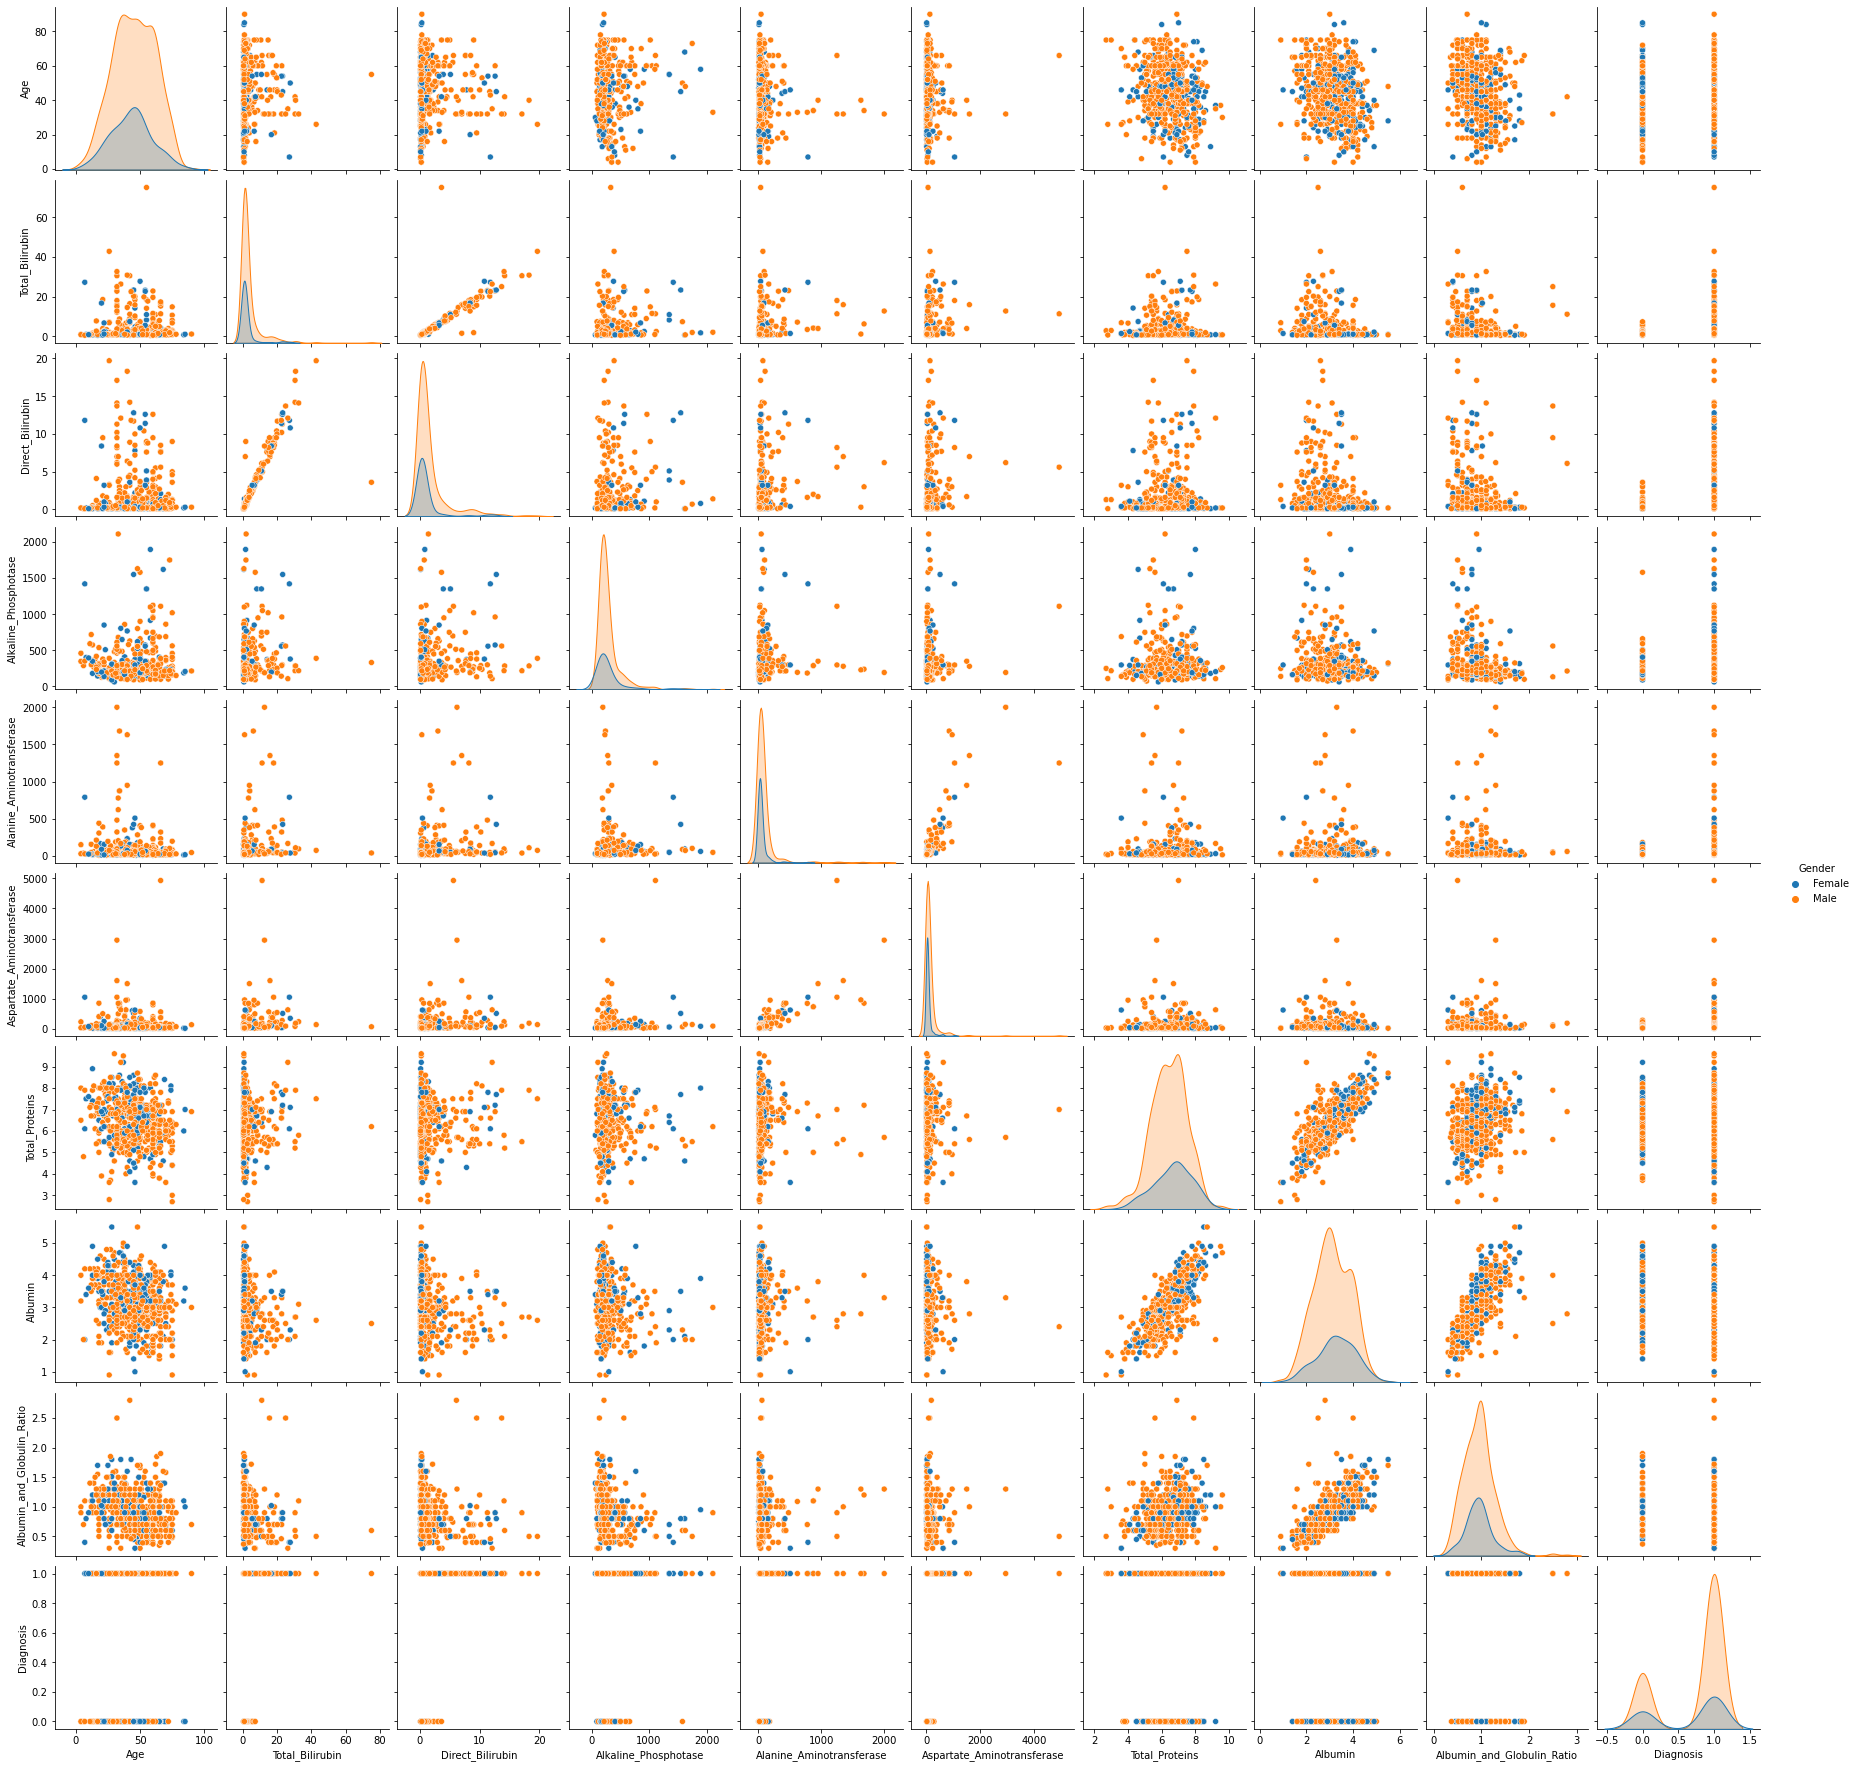

In [12]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients_data,hue='Gender')

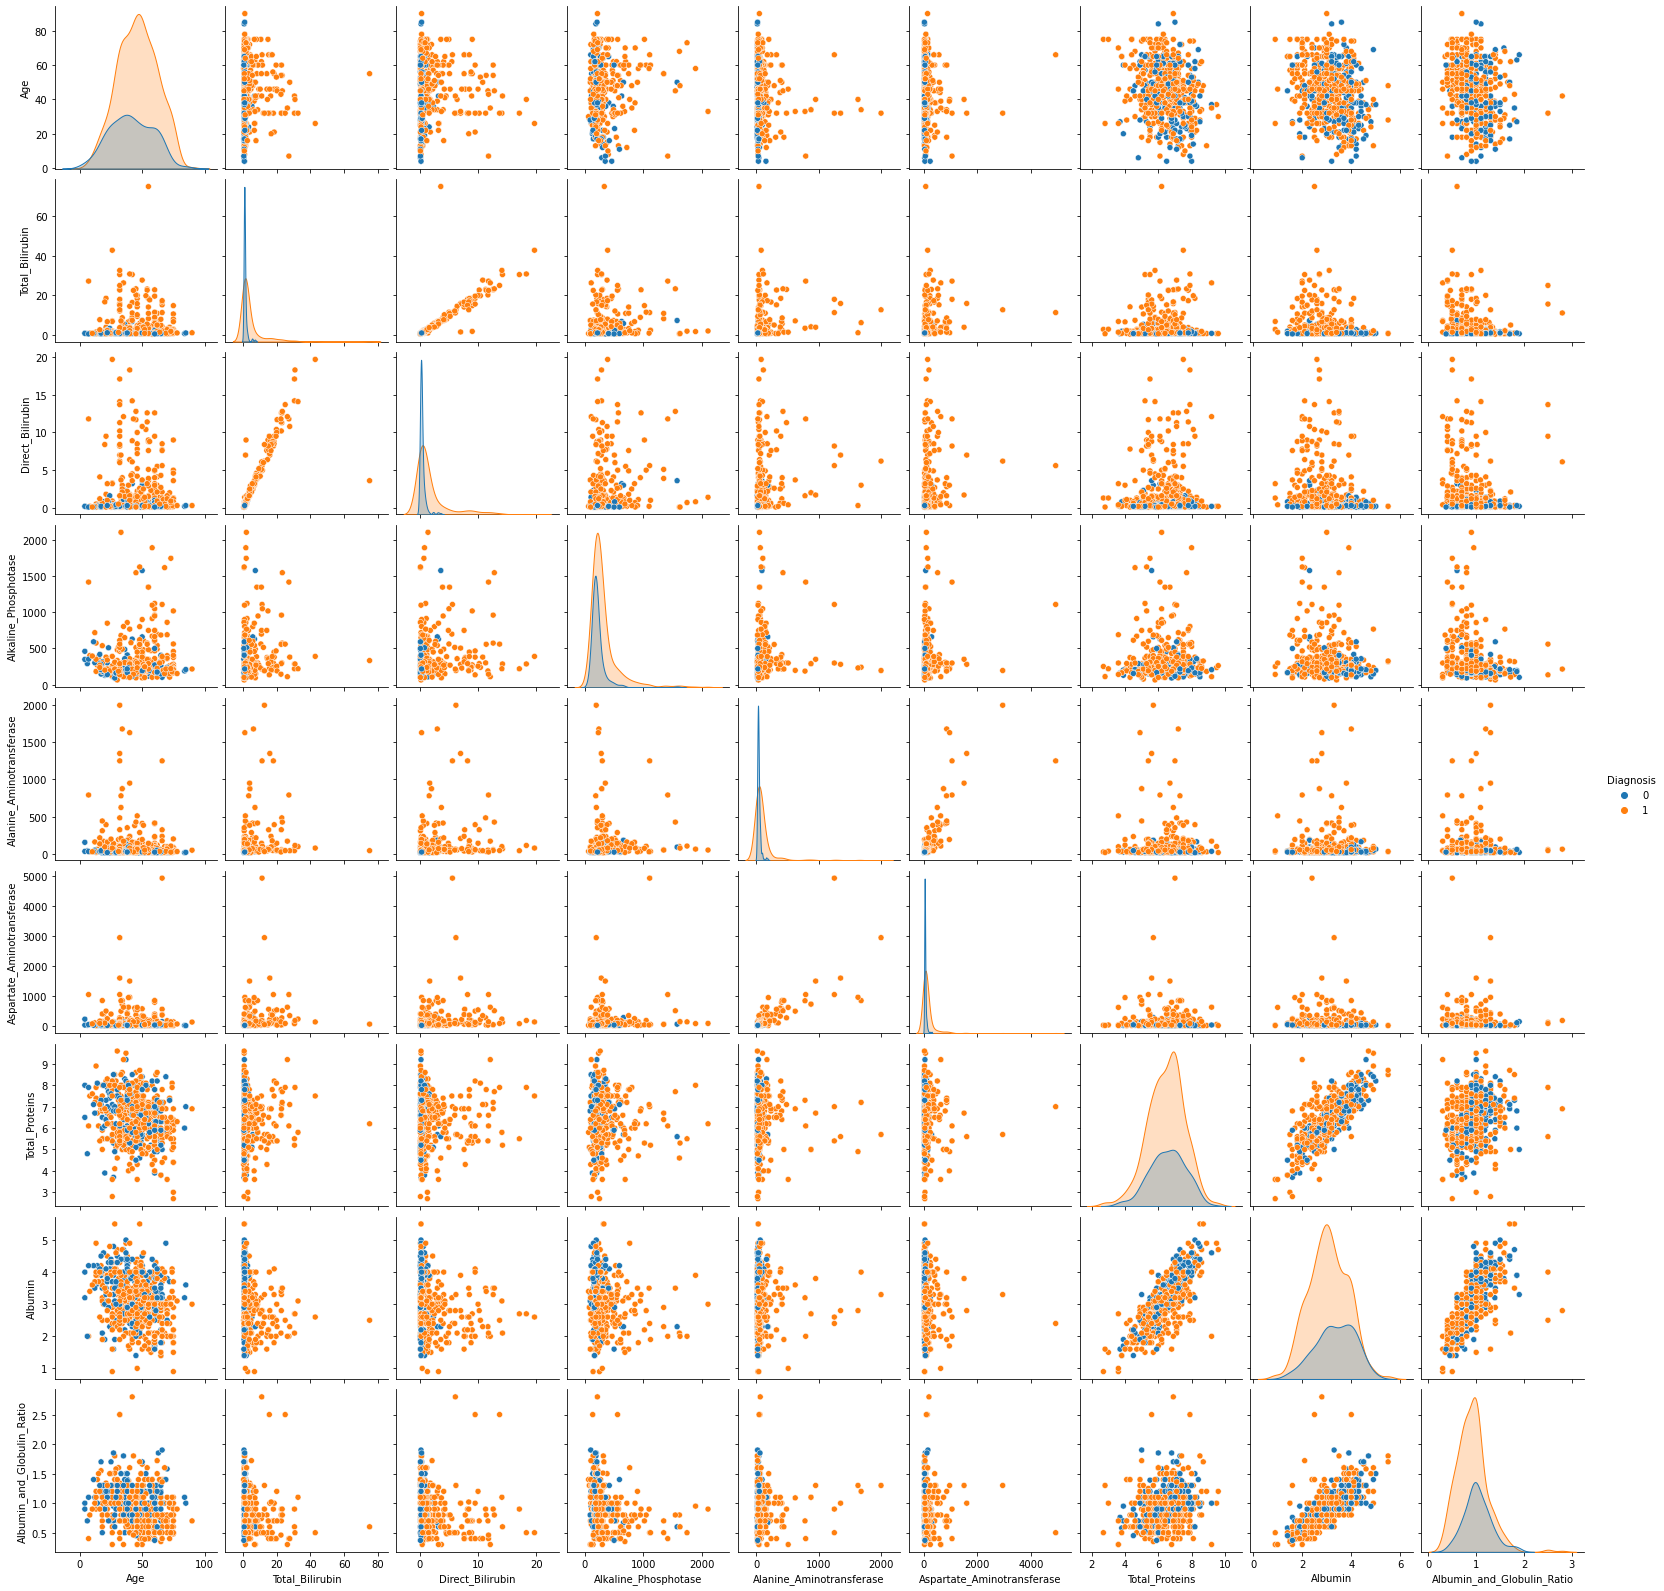

In [13]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients_data,hue='Diagnosis')

### Gender based comparison of different metrics

The protein Intake for males and females are as follows.

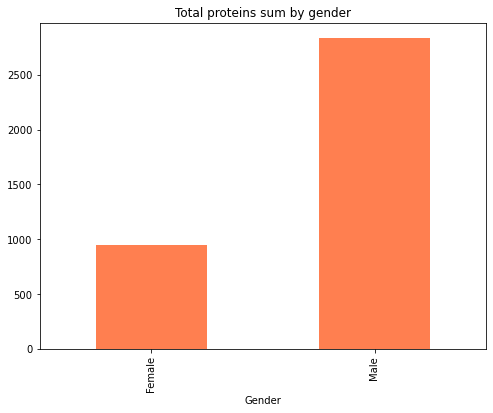

In [14]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender').sum()["Total_Proteins"].plot.bar(color='coral')
plt.title('Total proteins sum by gender');

The protein intake is higher in the case of Male and comparitively less in females.

The Albumin Level for males and females is as follows.

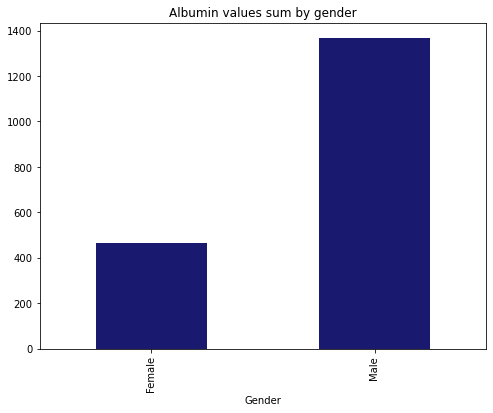

In [15]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')
plt.title('Albumin values sum by gender');

It is clear that the Albumin Level is higher in the case of male as compared to female.

The Bilirubin content for males and females is as follows.

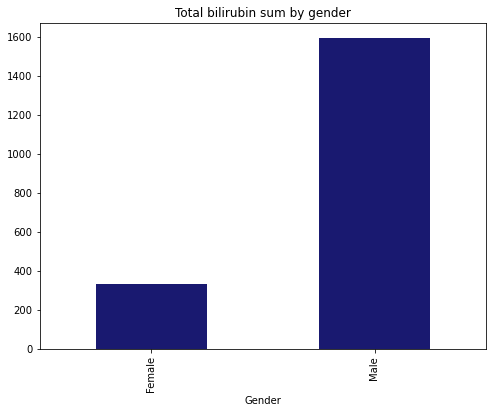

In [16]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='midnightblue')
plt.title('Total bilirubin sum by gender');

**We can clearly see that males has more bilirubin content compared to females.**

**Another point to be noted here is that higher the Bilirubin content, higher the case is prone to Liver disease.**

### Converting categorical column to binary numerical

In [17]:
patients_data['Gender'] = patients_data['Gender'].apply(lambda x:1 if x=='Male' else 0)

patients_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Let us check the correlation between the features using a heatmap:**

In [18]:
corr=patients_data.corr()

<AxesSubplot:>

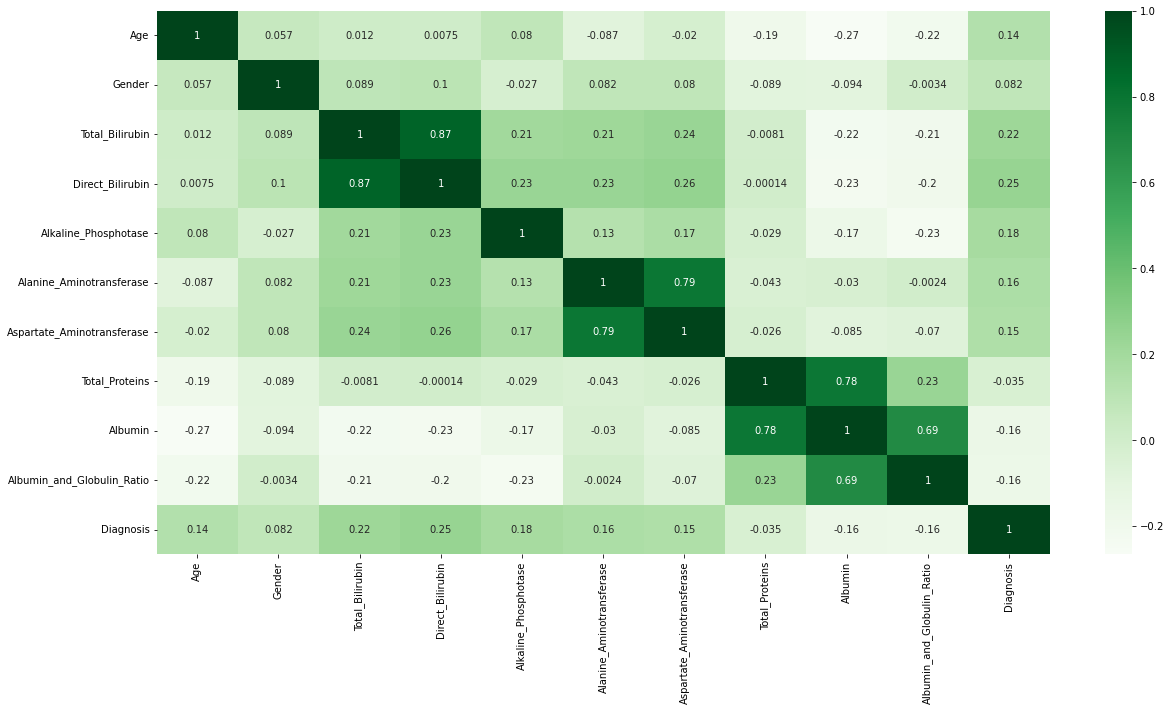

In [19]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

## Building the classification model


**Defining feature variables and the target.**

In [20]:
patients_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alanine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Diagnosis'],
      dtype='object')

In [21]:
patients_data.drop("Diagnosis", axis=1).apply(lambda x: x.corr(patients_data['Diagnosis']))

Age                           0.137351
Gender                        0.082416
Total_Bilirubin               0.220208
Direct_Bilirubin              0.246046
Alkaline_Phosphotase          0.184866
Alanine_Aminotransferase      0.163416
Aspartate_Aminotransferase    0.151934
Total_Proteins               -0.035008
Albumin                      -0.161388
Albumin_and_Globulin_Ratio   -0.162319
dtype: float64

In [22]:
X = patients_data.drop('Diagnosis', axis=1)
y = patients_data['Diagnosis']

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaling the feature columns
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

We will then split our dataset into train and test sets.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

**We split the training and testing  in a certain ratio as 70 for training and 30 for testing.**

## Training a Logistic Regression Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

**Finally, we are calculating the accuracy of our model.**

In [27]:
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.7657142857142857

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.34      0.39        38
           1       0.83      0.88      0.86       137

    accuracy                           0.77       175
   macro avg       0.64      0.61      0.62       175
weighted avg       0.75      0.77      0.75       175



## Training a SVC Classifier

In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7771428571428571

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.78      0.99      0.87       137

    accuracy                           0.78       175
   macro avg       0.39      0.50      0.44       175
weighted avg       0.61      0.78      0.68       175



## Training a Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7657142857142857

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.37      0.41        38
           1       0.83      0.88      0.85       137

    accuracy                           0.77       175
   macro avg       0.64      0.62      0.63       175
weighted avg       0.75      0.77      0.76       175



## Training a KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.7028571428571428

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.47      0.41        38
           1       0.84      0.77      0.80       137

    accuracy                           0.70       175
   macro avg       0.60      0.62      0.61       175
weighted avg       0.74      0.70      0.72       175



Using a support vector classifier (SVC) is giving us the highest accuracy.

#### Inference

Using custom user values for prediction.

In [35]:
value = {'age': 72, 
        'gender': 0, 
        'total_bilirubin': 0.6, 
        'direct_bilirubin': 0.1, 
        'alkaline_phosphotase': 122, 
        'Alanine_Aminotransferase': 22, 
        'aspartate_aminotransferase': 19,
        'total_proteins': 8.9, 
        'albumin': 4.9, 
        'albumin_and_globulin_ratio': 1.2}

In [36]:
data = pd.DataFrame([value])
data

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,Alanine_Aminotransferase,aspartate_aminotransferase,total_proteins,albumin,albumin_and_globulin_ratio
0,72,0,0.6,0.1,122,22,19,8.9,4.9,1.2


In [37]:
svc.predict(data)[0]

1

Here, the value 1 means that the prediction is **"Liver Disease"**.

In [38]:
value = {
      "Age": 19,
      "Gender": 0,
      "Total_Bilirubin": 0.3,
      "Direct_Bilirubin": 0.2,
      "Alkaline_Phosphotase": 54,
      "Alanine_Aminotransferase": 15,
      "Aspartate_Aminotransferase": 26,
      "Total_Proteins": 5.1,
      "Albumin": 1.9,
      "Albumin_and_Globulin_Ratio": 1.0
    }

In [39]:
data = pd.DataFrame([value])
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio
0,19,0,0.3,0.2,54,15,26,5.1,1.9,1.0


In [40]:
svc.predict(data)[0]

0

Here, the value 0 means that the prediction is **"No Liver Disease"**.